In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Subquestion a)**

Iteration 1: 4 misclassified points
Iteration 2: 0 misclassified points
Converged: No misclassifications in this iteration.
Time required for training: 0.0011 seconds
Perceptron classification accuracy on training set: 1.0


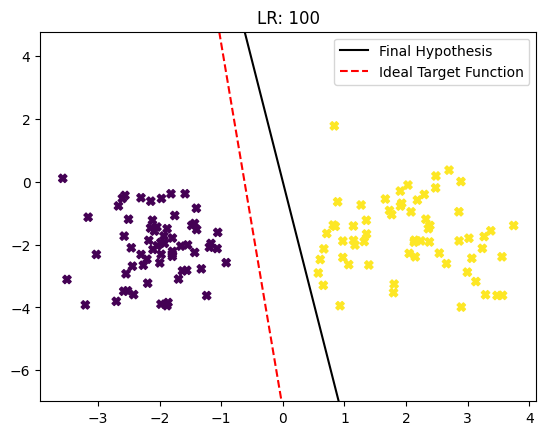

Perceptron misclassification error on test set: 30


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

class CP:
    def __init__(self, lr=1, max_iters=500):
        self.lr = lr
        self.max_iters = max_iters
        self.w = None
        self.b = None

    def train(self, feats, labels):
        n, m = feats.shape
        self.w = np.zeros(m)
        self.b = 0

        bin_labels = np.where(labels > 0, 1, -1)

        start_time = time.time()

        for it in range(self.max_iters):
            mis_count = 0

            for feat, label in zip(feats, bin_labels):
                s_t = np.dot(self.w, feat)
                pred_label = np.sign(s_t)

                if pred_label != label:
                    self.w += label * feat
                    mis_count += 1

            print(f"Iteration {it + 1}: {mis_count} misclassified points")

            if mis_count == 0:
                print("Converged: No misclassifications in this iteration.")
                break

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Time required for training: {elapsed_time:.4f} seconds")

    def predict(self, feats):
        s_t = np.dot(feats, self.w)
        pred_labels = np.where(s_t >= 0, 1, 0)
        return pred_labels

def calc_error(true_labels, preds_train):
    return np.sum(true_labels != preds_train)

def calculate_ideal_weights(feats_train, labels_train):
    # Normalize features by dividing by the maximum absolute value
    normalized_feats = feats_train / np.max(np.abs(feats_train))

    # Add a column of ones to the normalized features
    feats_with_ones = np.column_stack((np.ones(len(feats_train)), normalized_feats))

    # Estimate ideal weights using linear regression
    ideal_weights = np.linalg.pinv(feats_with_ones).dot(labels_train)
    return ideal_weights


def train_and_plot(feats_train, labels_train, feats_test, labels_test, lr):
    perceptron = CP(lr=lr, max_iters=1000)
    perceptron.train(feats_train, labels_train)
    preds_train = perceptron.predict(feats_train)
    error_train = calc_error(labels_train, preds_train)

    print("Perceptron classification accuracy on training set:", calc_accuracy(labels_train, preds_train))

    plt.scatter(feats_train[:, 0], feats_train[:, 1], marker="X", c=labels_train)

    x1, x2 = np.amin(feats_train[:, 0]), np.amax(feats_train[:, 0])
    y1, y2 = (-perceptron.w[0] * x1 - perceptron.b) / perceptron.w[1], (-perceptron.w[0] * x2 - perceptron.b) / perceptron.w[1]
    plt.plot([x1, x2], [y1, y2], "k", label="Final Hypothesis")

    ideal_weights = calculate_ideal_weights(feats_train, labels_train)
    y_ideal_1 = (-ideal_weights[1] * x1 - ideal_weights[0]) / ideal_weights[2]
    y_ideal_2 = (-ideal_weights[1] * x2 - ideal_weights[0]) / ideal_weights[2]
    plt.plot([x1, x2], [y_ideal_1, y_ideal_2], "r--", label="Ideal Target Function")

    plt.ylim([np.amin(feats_train[:, 1]) - 3, np.amax(feats_train[:, 1]) + 3])
    plt.legend()
    plt.title(f"LR: {lr}")
    plt.show()

    preds_test = perceptron.predict(feats_test)
    error_test = calc_error(labels_test, preds_test)

    print("Perceptron misclassification error on test set:", error_test)

if __name__ == "__main__":
    def calc_accuracy(true_labels, preds):
        return np.sum(true_labels == preds) / len(true_labels)
    
    feats, labels = make_classification(n_samples=2120, n_features=2, n_informative=2, n_redundant=0,
                                        n_clusters_per_class=1, class_sep=2.0, random_state=4)

    feats_train, feats_test, labels_train, labels_test = train_test_split(
        feats, labels, test_size=0.94, train_size=0.06, random_state= 7
    )

    train_and_plot(feats_train, labels_train, feats_test, labels_test, lr=100)


**Subquestion b)**

Iteration 1: 4 misclassified points
Iteration 2: 0 misclassified points
Converged: No misclassifications in this iteration.
Time required for training: 0.0026 seconds
Perceptron classification accuracy on training set: 1.0


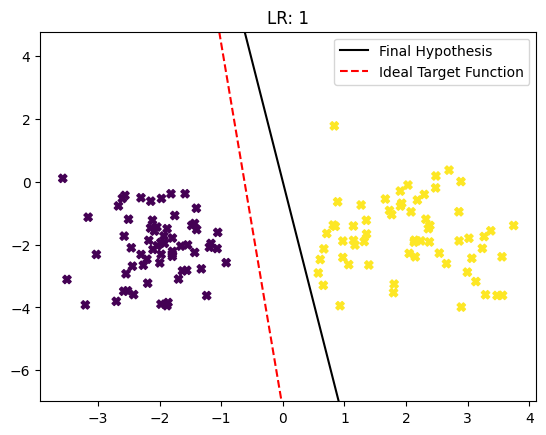

Perceptron misclassification error on test set: 30


In [3]:
train_and_plot(feats_train, labels_train, feats_test, labels_test, lr=1)

**Subquestion c)**

Iteration 1: 4 misclassified points
Iteration 2: 0 misclassified points
Converged: No misclassifications in this iteration.
Time required for training: 0.0021 seconds
Perceptron classification accuracy on training set: 1.0


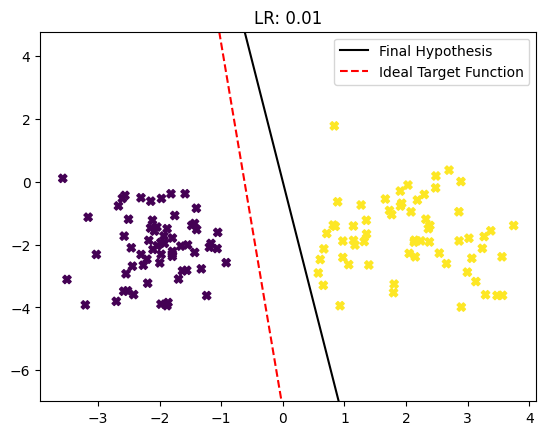

Perceptron misclassification error on test set: 30


In [4]:
train_and_plot(feats_train, labels_train, feats_test, labels_test, lr=0.01)

**Subquestion d)**

Iteration 1: 4 misclassified points
Iteration 2: 0 misclassified points
Converged: No misclassifications in this iteration.
Time required for training: 0.0010 seconds
Perceptron classification accuracy on training set: 1.0


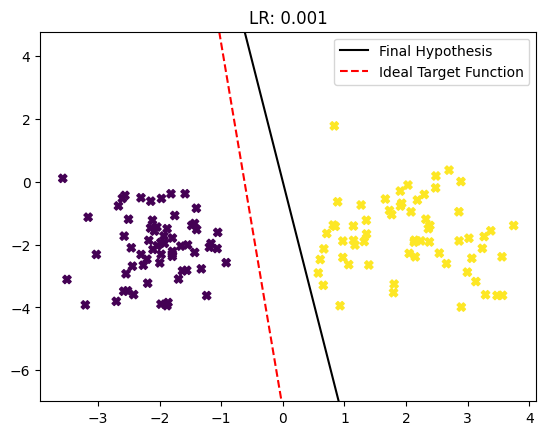

Perceptron misclassification error on test set: 30


In [5]:
train_and_plot(feats_train, labels_train, feats_test, labels_test, lr=0.001)

**Subquestion e)**
*These observations are based on experimenting with different values of random_state*

> * Lower learning rates take more time to execute, whereas higher learning rates converge faster. This can also be observed by the values which I have included in the code to give output for the execution time in each case.
> * Higher learning rates leads to less accurate final hypothesis as they overshoot the bias and weights, whereas moderate learning rates do not do so.
> * Perceptron learning algorithm works very fast and gives apt results on linearly separable datasets.
> * Plots provide a better way to visualise and analyse the accuracy of the model.
> * Higher learning rates may also take less steps to execute the final hypothesis as compared to lower learning rates.

 **Subquestion f)**

Iteration 1: 76 misclassified points
Iteration 2: 76 misclassified points
Iteration 3: 75 misclassified points
Iteration 4: 76 misclassified points
Iteration 5: 76 misclassified points
Iteration 6: 75 misclassified points
Iteration 7: 76 misclassified points
Iteration 8: 76 misclassified points
Iteration 9: 75 misclassified points
Iteration 10: 75 misclassified points
Iteration 11: 76 misclassified points
Iteration 12: 76 misclassified points
Iteration 13: 75 misclassified points
Iteration 14: 76 misclassified points
Iteration 15: 76 misclassified points
Iteration 16: 76 misclassified points
Iteration 17: 76 misclassified points
Iteration 18: 75 misclassified points
Iteration 19: 76 misclassified points
Iteration 20: 76 misclassified points
Iteration 21: 75 misclassified points
Iteration 22: 76 misclassified points
Iteration 23: 76 misclassified points
Iteration 24: 75 misclassified points
Iteration 25: 75 misclassified points
Iteration 26: 76 misclassified points
Iteration 27: 76 misc

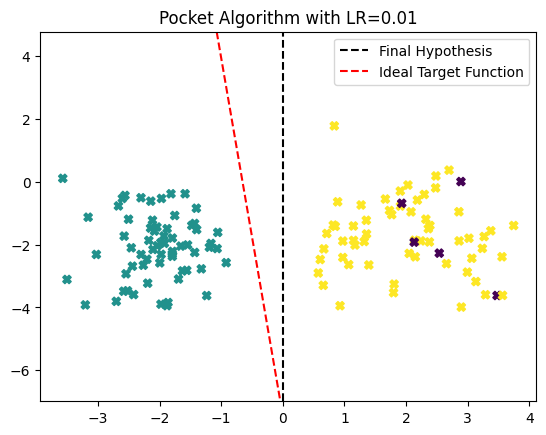

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

class PA:
    def __init__(self, lr=0.01, mi=1000):
        self.lr = lr
        self.mi = mi
        self.w = None
        self.bw = None
        self.bm = float('inf')

    def train(self, f, l):
        ns, nf = f.shape
        self.w = np.zeros(nf)
        self.bw = np.copy(self.w)

        for i in range(self.mi):
            mc = 0

            for ft, lb in zip(f, l):
                lo = np.dot(ft, self.w)
                pl = np.sign(lo)

                if pl != lb:
                    mc += 1

                    if mc < self.bm:
                        self.bw = np.copy(self.w)
                        self.bm = mc

                    up = self.lr * lb * ft
                    self.w += up

            print(f"Iteration {i + 1}: {mc} misclassified points")

            if mc == 0:
                print("Converged: No misclassifications in this iteration.")
                break

    def predict(self, f):
        lo = np.dot(f, self.bw)
        pl = np.sign(lo)
        return pl

def flip_labels(l, fp=0.1):
    nf = int(len(l) * fp)
    fi = np.random.choice(len(l), nf, replace=False)
    l[fi] *= -1
    return l

def ciw(f_train, l_train):
    nf = f_train / np.max(np.abs(f_train))
    fw = np.column_stack((np.ones(len(f_train)), nf))
    iw = np.linalg.pinv(fw).dot(l_train)
    return iw

def tnp(f_train, l_train, f_test, l_test, lr):
    l_train_flipped = flip_labels(l_train, fp=0.1)
    l_test_flipped = flip_labels(l_test, fp=0.1)

    pa = PA(lr=0.01, mi=1000)
    pa.train(f_train, l_train_flipped)

    pt = pa.predict(f_test)
    et = np.sum(l_test_flipped != pt)
    print("Pocket Algorithm misclassification error on flipped test set:", et)

    plt.scatter(f_train[:, 0], f_train[:, 1], marker="X", c=l_train_flipped)

    x_1, x_2 = np.amin(f_train[:, 0]), np.amax(f_train[:, 0])
    y_1, y_2 = 0, 0

    if pa.bw[1] != 0:
        y_1, y_2 = (-pa.bw[1] * x_1 - pa.bw[0]) / pa.bw[1], (-pa.bw[1] * x_2 - pa.bw[0]) / pa.bw[1]
        plt.plot([x_1, x_2], [y_1, y_2], "k", label="Final Hypothesis")
    else:
        if pa.bw[0] != 0:
            plt.axvline(x=-pa.bw[0]/pa.bw[1], color='k', linestyle='--', label="Final Hypothesis")
        else:
            plt.axvline(x=0, color='k', linestyle='--', label="Final Hypothesis")

    iw = ciw(f_train, l_train)
    yi_1 = (-iw[1] * x_1 - iw[0]) / iw[2]
    yi_2 = (-iw[1] * x_2 - iw[0]) / iw[2]
    plt.plot([x_1, x_2], [yi_1, yi_2], "r--", label="Ideal Target Function")

    plt.ylim([np.amin(f_train[:, 1]) - 3, np.amax(f_train[:, 1]) + 3])
    plt.legend()
    plt.title(f"Pocket Algorithm with LR={lr}")
    plt.show()

if __name__ == "__main__":
    f, l = make_classification(n_samples=2120, n_features=2, n_informative=2, n_redundant=0,
                                        n_clusters_per_class=1, class_sep=2.0, random_state=4)

    f_train, f_test, l_train, l_test = train_test_split(
        f, l, test_size=0.94, train_size=0.06, random_state=7
    )

    tnp(f_train, l_train, f_test, l_test, lr=0.01)
